# 共享單車分析

In [1]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
bike_data = pd.read_csv("train.csv")

In [2]:
bike_data.shape

(10886, 12)

- datetime 時間
- season 季節(1234分別為春夏秋冬)
- holiday 假日(0否 1是)
- workingday 工作日(0否 1是)
- weather 天氣(1晴天 2陰天 3小雨小雪 4惡劣天氣)
- temp 實際溫度
- atemp 體感溫度
- humidity 濕度
- windspeed 風速
- casual 未註冊用戶
- registered 註冊用戶
- count 租借數量

In [3]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 查看數據集，檢查缺失值
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# 查看描述信息，檢查異常值
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 為了方便視覺化數據，把datetime拆分成：日期、年、月、天、小時、星期共6列，把日期資料的文字類型轉換成資料類型

In [6]:
bike_data["date"] = bike_data["datetime"].apply (lambda x : x.split()[0])
bike_data["year"] = bike_data["datetime"].apply (lambda x : x.split()[0].split("-")[0]).astype("int64")
bike_data["month"] = bike_data["datetime"].apply (lambda x : x.split()[0].split("-")[1]).astype("int64")
bike_data["day"] = bike_data["datetime"].apply (lambda x : x.split()[0].split("-")[2]).astype("int64")
bike_data["hour"] = bike_data["datetime"].apply (lambda x : x.split()[0].split("-")[0]).astype("int64")
bike_data["weekday"] = bike_data["datetime"].apply (lambda x : pd.to_datetime(x).weekday())

In [7]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,2011,5


## 分類數據特徵提取:季節

In [8]:
seasondf = pd.DataFrame()
# 使用 get-dummies進行one-hot編碼，列名前綴是season
seasondf = pd.get_dummies(bike_data.season,prefix = "season").astype(int)
seasondf.head()

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [9]:
bike_data = pd.concat([bike_data,seasondf],axis = 1)

## 分類數據特徵提取:天氣

In [10]:
weatherdf = pd.DataFrame()
# 使用 get-dummies進行one-hot編碼，列名前綴是season
weatherdf = pd.get_dummies(bike_data.weather,prefix = "weather").astype(int)
weatherdf.head()

,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [11]:
bike_data = pd.concat([bike_data,weatherdf],axis = 1)

In [12]:
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,weekday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,2011,5,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,2011,5,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,2011,5,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,2011,5,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,2011,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,2012,2,0,0,0,1,1,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,2012,2,0,0,0,1,1,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,2012,2,0,0,0,1,1,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,2012,2,0,0,0,1,1,0,0,0


# 數據可視化

## 1.查看用戶結構

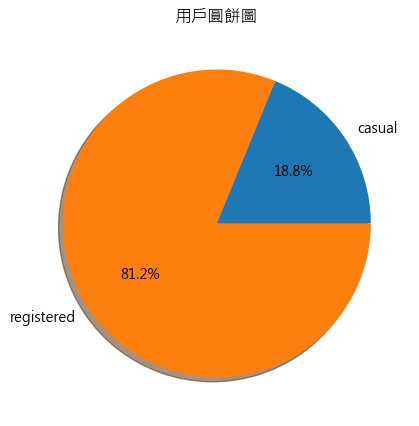

In [13]:
# 設定字型
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
# 創建一個子圖
fig, ax1 = plt.subplots(figsize=(10, 5))
# 繪製圓餅圖
df_user = bike_data[["casual", "registered"]].sum()
ax1.pie(df_user, labels=["casual", "registered"], shadow=True, autopct="%1.1f%%")
ax1.set_title("用戶圓餅圖")
# 顯示圖表
plt.show()

## <font color='red'>由上圖可了解 用共享單車的客戶註冊的比例比較高</font>

## 2.查看用戶總數在兩年的變化

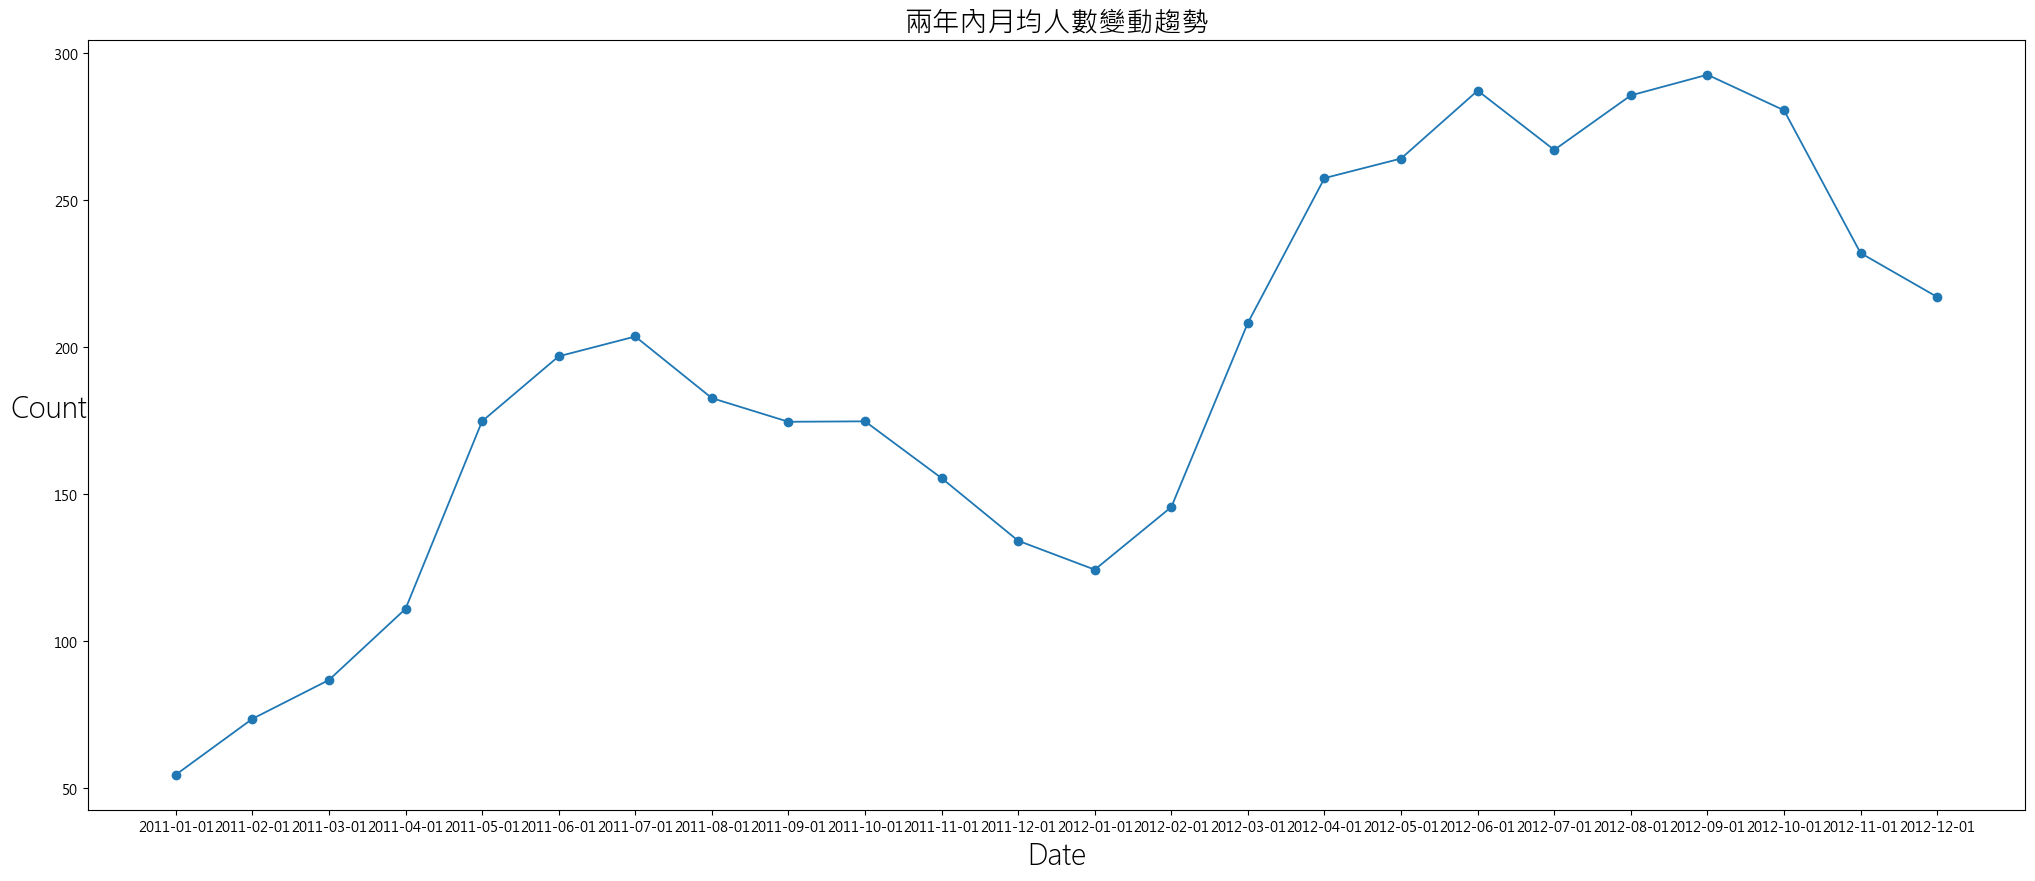

In [23]:
# 設定字型
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
df_alluser = bike_data.groupby(["year","month"],as_index = False).agg({"date":"min","count":"mean"})

fig = plt.figure(figsize=(25,10))

ax = plt.subplot(1,1,1)
plt.plot(df_alluser["date"],df_alluser["count"], marker="o", linewidth=1.3, label="Monthly average")
ax.set_title("兩年內月均人數變動趨勢", fontsize=20)
ax.set_xlabel("Date", fontsize=20, weight="light")
ax.set_ylabel("Count", rotation=360, fontsize=20, weight="light")

plt.show()

##  <font color='red'>由上圖可了解 總用戶在這兩年有保持成長的趨勢</font>

## 3.查看用戶數量在不同月份季節的情況

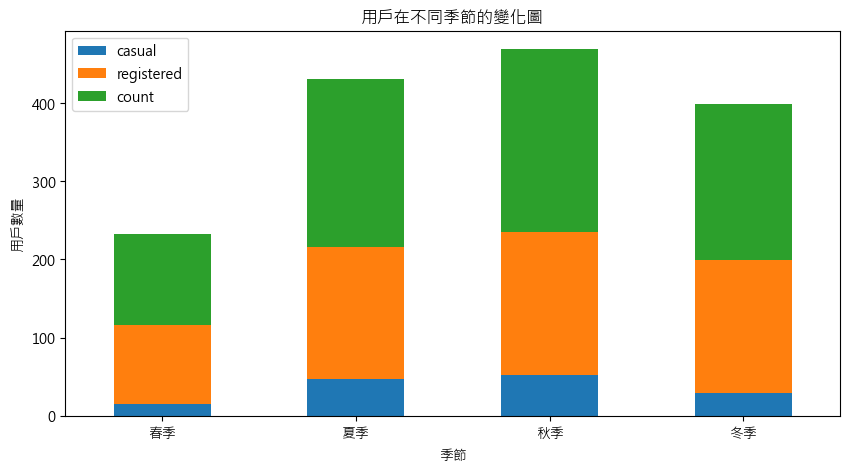

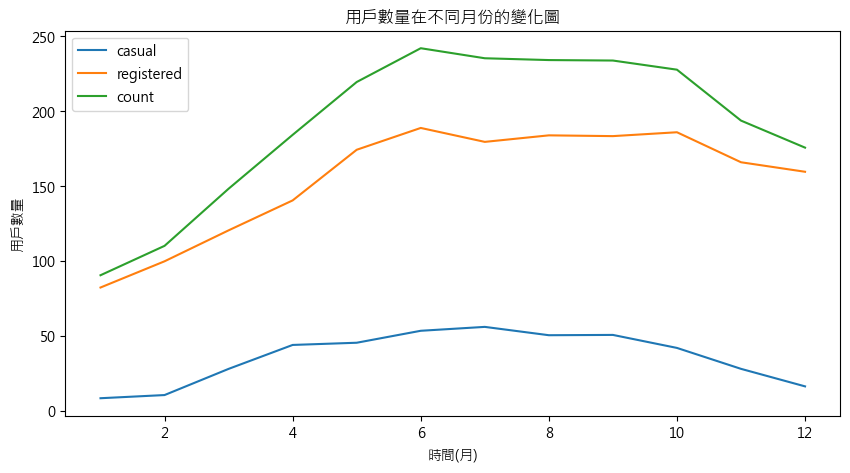

In [21]:
# 用戶在不同季節的變化圖
fig, ax1 = plt.subplots(figsize=(10, 5))
df_season = bike_data.groupby(["season"]).agg({"casual": "mean", "registered": "mean", "count": "mean"})
df_season.plot.bar(title="用戶在不同季節的變化圖", stacked=True, ax=ax1)
ax1.set_xticklabels(["春季", "夏季", "秋季", "冬季"], rotation='horizontal')
plt.xlabel("季節")
plt.ylabel("用戶數量")
plt.show()

# 用戶數量在不同月份的變化圖
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(1, 1, 1)  # 修正這裡的錯誤，ax2的定義
df_month = bike_data.groupby(["month"]).agg({"casual": "mean", "registered": "mean", "count": "mean"})
df_month.plot(ax=ax2)
plt.title("用戶數量在不同月份的變化圖")
plt.xlabel("時間(月)")
plt.ylabel("用戶數量")
plt.show()


## <font color='red'>由上圖可了解 用戶在秋夏季最多人使用，再來是冬季最後是春季</font>

## 4. 查看用戶分別在工作日和假期的分布

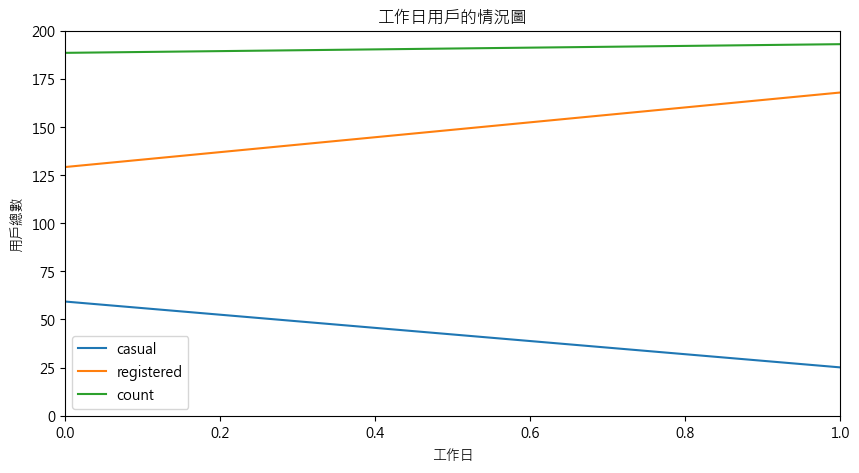

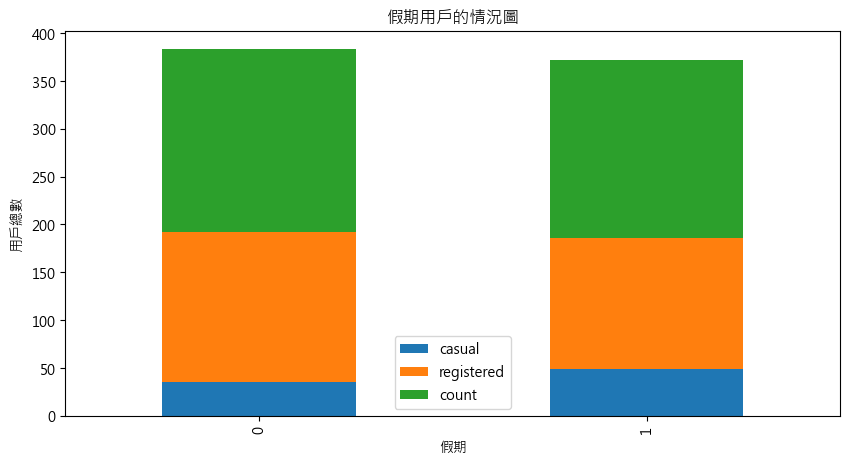

In [20]:
# 查看用戶在工作日的分布情況
# workongday: 工作日 (非節假日或周末, (1:是 ,0:否))
fig, ax3 = plt.subplots(figsize=(10, 5))
df_workingday = bike_data.groupby(["workingday"]).agg({"casual": "mean", "registered": "mean", "count": "mean"})
df_workingday.plot(title="工作日用戶的情況圖", ax=ax3)
plt.axis([0, 1, 0, 200])
plt.ylabel("用戶總數")
plt.xlabel("工作日")
plt.show()


# 查看用戶在假期的分布情況
# Holiday : 假期 (1:是 , 0:否)
fig, ax4 = plt.subplots(figsize=(10, 5))
df_holiday = bike_data.groupby(["holiday"]).agg({"casual": "mean", "registered": "mean", "count": "mean"})
df_holiday.plot.bar(title="假期用戶的情況圖", ax=ax4, stacked=True)
plt.ylabel("用戶總數")
plt.xlabel("假期")
plt.show()

## <font color='red'>由上圖了解，用戶總數在工作日和假期差異不大，而註冊用戶在工作日增加假期減少，非註冊用戶在假期增加工作日減少</font>

In [17]:
# 查看用戶分別在工作日和假期的時刻分布
bike_data_workingday = bike_data[bike_data["workingday"]==1]
bike_data_workingday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,weekday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,...,2011,0,1,0,0,0,1,0,0,0
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,...,2011,0,1,0,0,0,1,0,0,0
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,...,2011,0,1,0,0,0,1,0,0,0
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,...,2011,0,1,0,0,0,1,0,0,0
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,...,2011,0,1,0,0,0,1,0,0,0


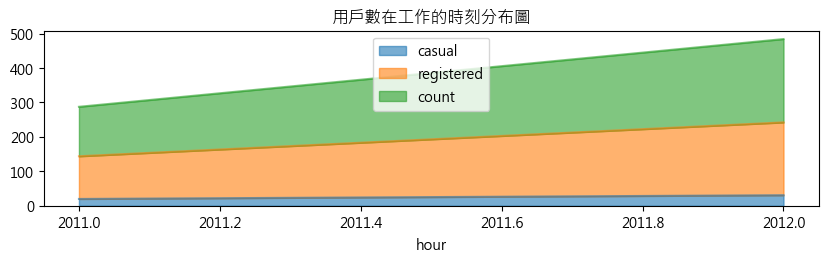

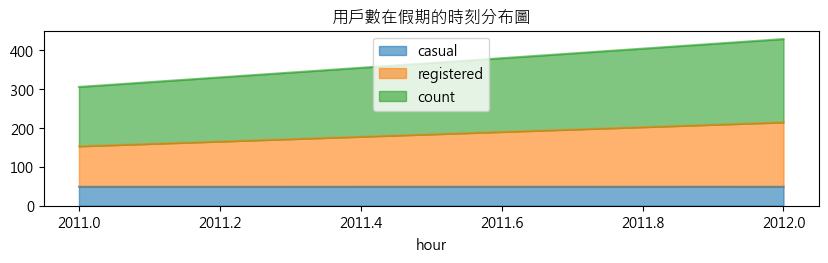

In [18]:
fig = plt.figure(figsize = (10,5))
ax5 = fig.add_subplot(2,1,1)
df_workingday = bike_data_workingday.groupby([bike_data_workingday["hour"]]).agg({"casual": "mean", "registered": "mean", "count": "mean"})
df_workingday.plot(ax = ax5,kind = "area",alpha = 0.6)
plt.title("用戶數在工作的時刻分布圖")
# 查看用戶數在假期的時刻分布圖
bike_data_holiday = bike_data[bike_data["holiday"] == 1]
fig = plt.figure(figsize = (10,5))
ax6 = ax5 = fig.add_subplot(2,1,2)
df_holiday = bike_data_holiday.groupby([bike_data_holiday["hour"]]).agg({"casual": "mean", "registered": "mean", "count": "mean"})
df_holiday .plot(ax = ax6,kind = "area",alpha = 0.6)
plt.title("用戶數在假期的時刻分布圖")
plt.show()

## <font color='red'>由圖了解，使用者數在工作日分佈圖中出現兩個波峰，對應為上下班時間，為通勤高峰期。 </font>
## <font color='red'>而在假期，用戶數在白天時間段8-18（點）持續上升保持較高數量，夜間持續下降保持較低數量，符合人們白天外出遊玩需要用車，夜間休息的生活規律。</font>

# 5.查看用戶數量與天氣的因素分析

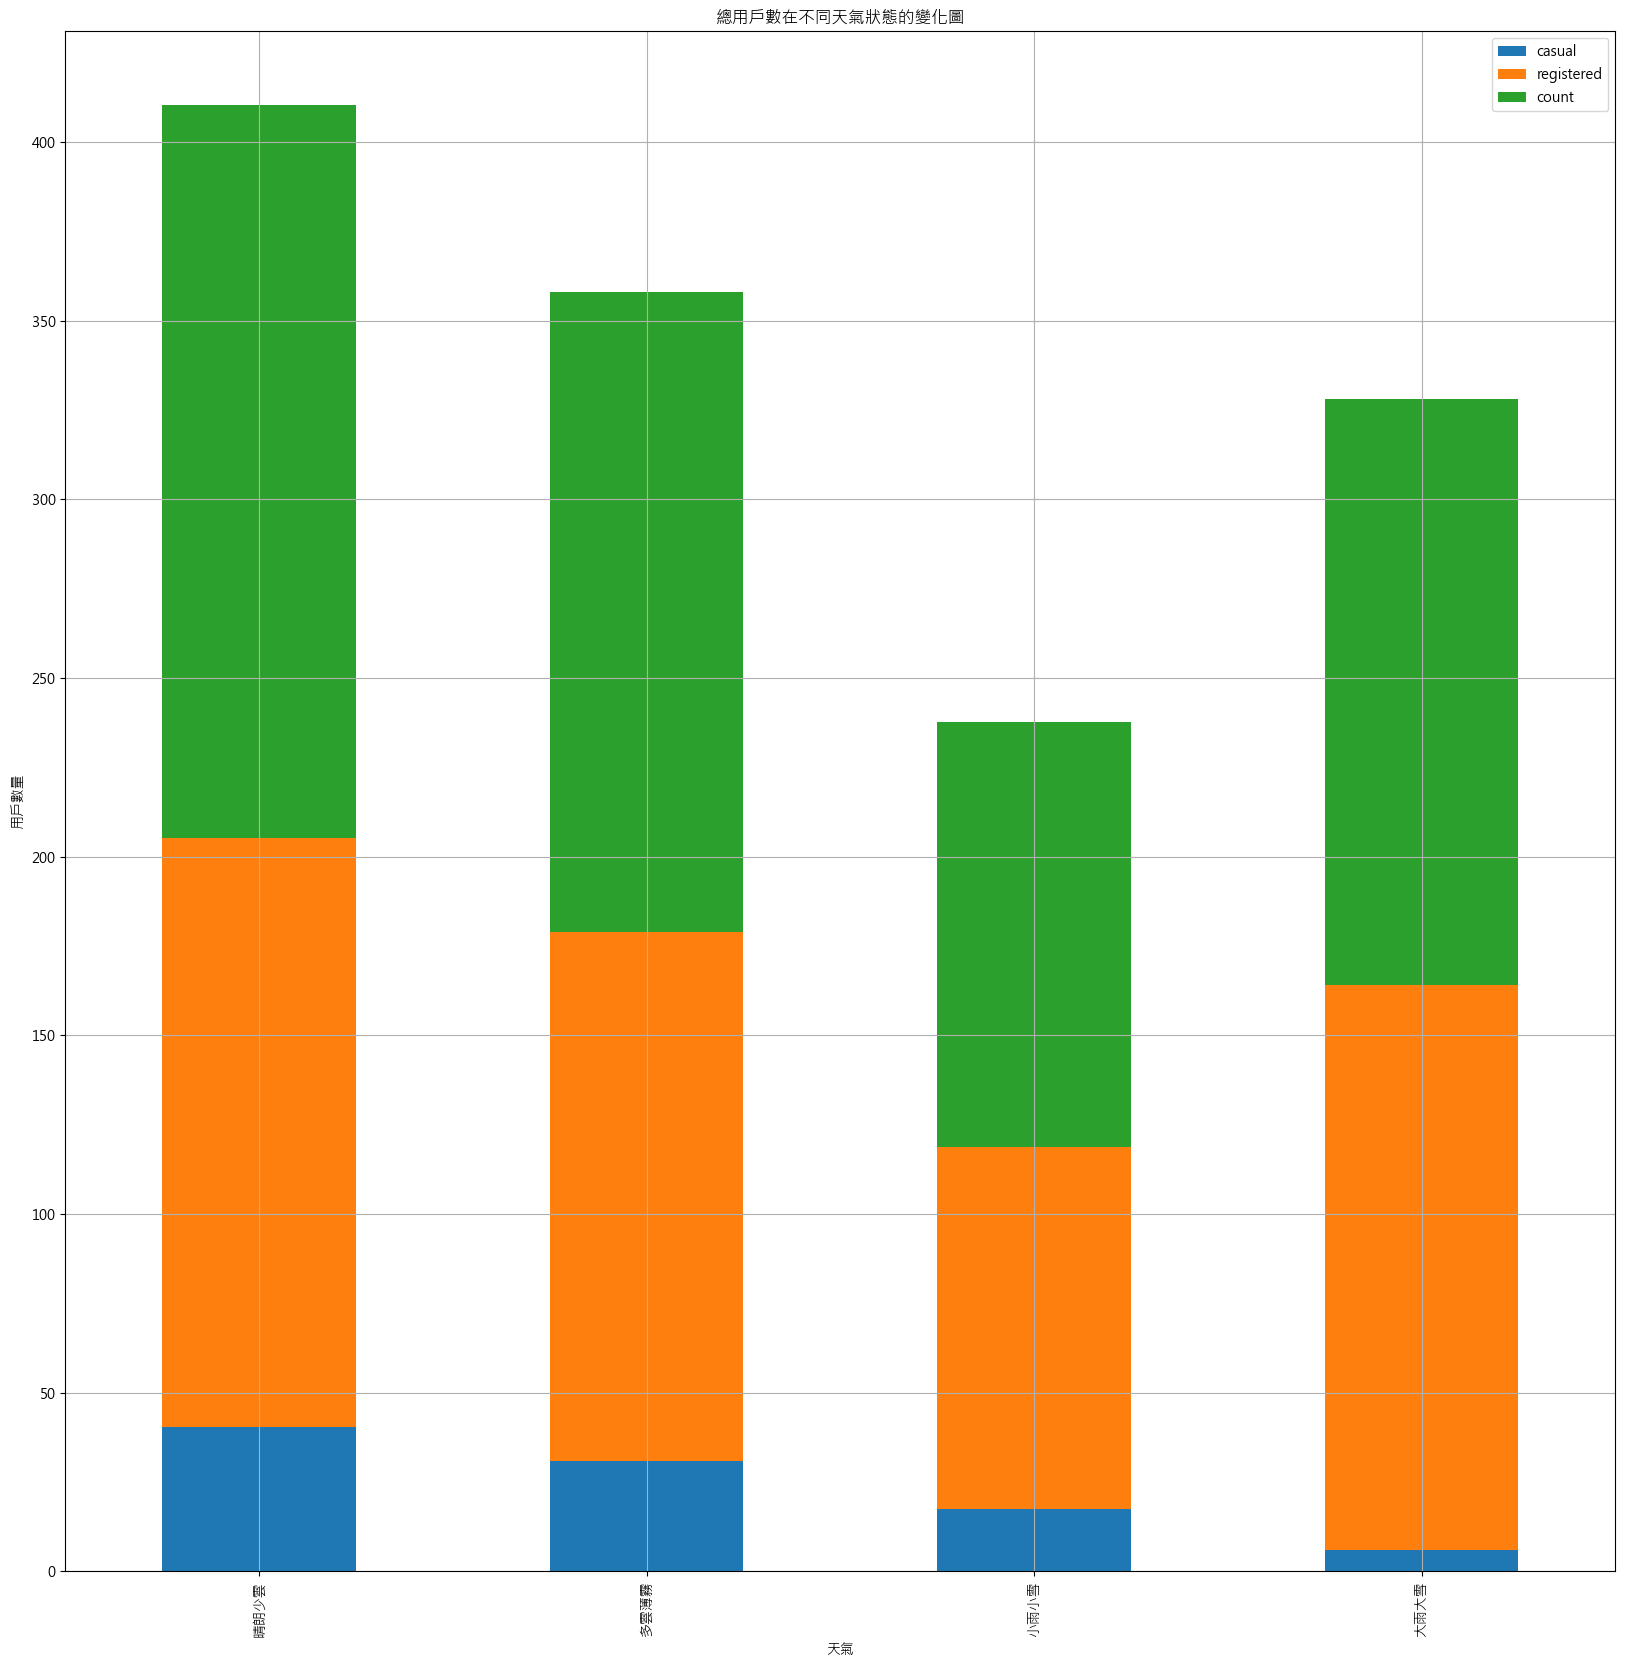

In [40]:
# 查看用戶數在不同天氣狀態下的情況
fig, ax7 = plt.subplots(figsize=(20, 20))  # 創建一張圖

df_season = bike_data.groupby([bike_data["weather"]]).agg({"casual": "mean", "registered": "mean", "count": "mean"})

# 在第一張圖上繪製堆疊條形圖
df_season.plot.bar(title="總用戶數在不同天氣狀態的變化圖", stacked=True, ax=ax7)

# 將標籤作為一個列表傳遞
ax7.set_xticklabels(["晴朗少雲", "多雲薄霧", "小雨小雪", "大雨大雪"])

# 新增格線
ax7.grid(True)

plt.xlabel("天氣")
plt.ylabel("用戶數量")
plt.show()

## <font color='red'>由上圖了解晴朗少雲用車數量最多，小雨小雪用車人數少</font>

# 6.查看用戶總數與溫度跟體感溫度的相關分布

Text(0.5, 1.0, '總用戶在不同體感溫度狀態的變化圖')

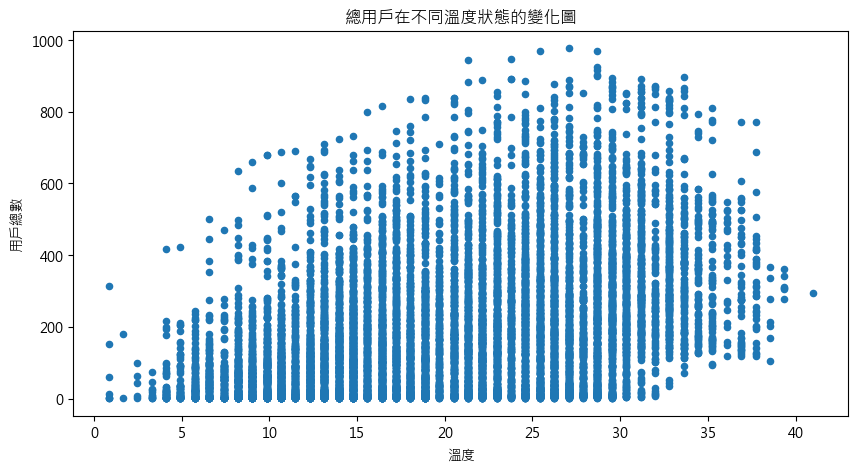

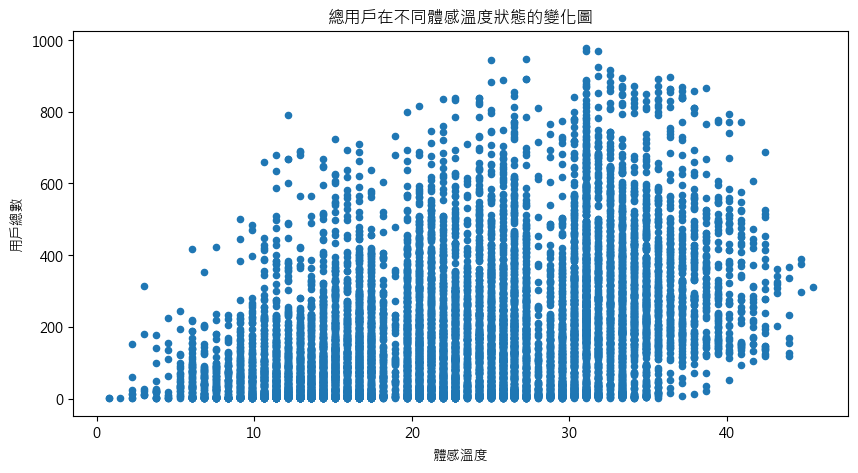

In [43]:
# 查看溫度與用戶總數的圖形關係
fig = plt.figure(figsize = (10,5))
ax8 = fig.add_subplot(1,1,1)
df_temp = bike_data[["temp","count"]]
df_temp.plot(x = "temp", y = "count",kind = "scatter",ax = ax8)
plt.xlabel("溫度")
plt.ylabel("用戶總數")
plt.title("總用戶在不同溫度狀態的變化圖")
# 查看體感溫度與用戶總數的圖形關係
fig = plt.figure(figsize = (10,5))
ax9 = ax8 = fig.add_subplot(1,1,1)
df_temp = bike_data[["atemp","count"]]
df_temp.plot(x = "atemp", y = "count",kind = "scatter",ax = ax8)
plt.xlabel("體感溫度")
plt.ylabel("用戶總數")
plt.title("總用戶在不同體感溫度狀態的變化圖")

## <font color='red'>由上圖了解，用戶總數與溫度和體感溫度呈線性關係</font>

# 7.查看用戶總數與濕度、風的相關性

(0.0, 45.0, 0.0, 1000.0)

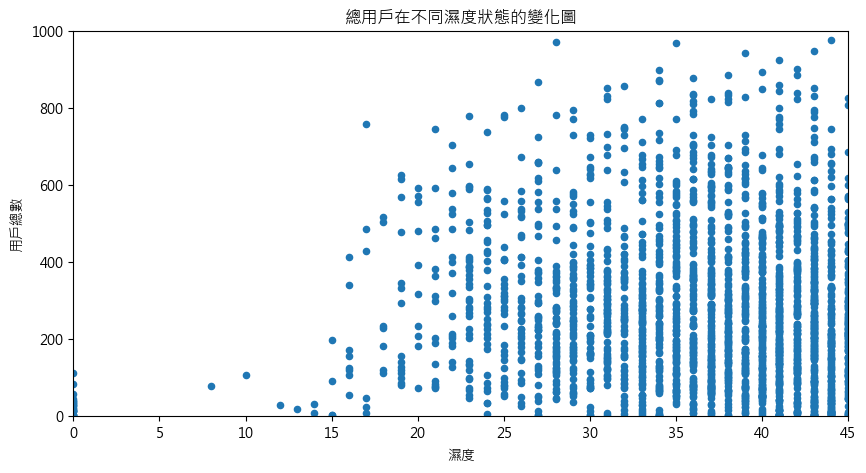

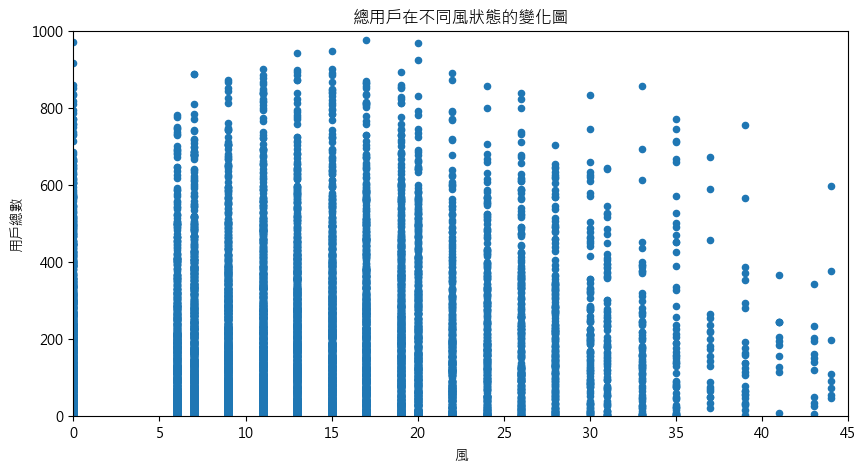

In [47]:
# 查看濕度與用戶總數的圖形關係
fig = plt.figure(figsize = (10,5))
ax10 = fig.add_subplot(1,1,1)
df_temp = bike_data[["humidity","count"]]
df_temp.plot(x = "humidity", y = "count",kind = "scatter",ax = ax10)
plt.xlabel("濕度")
plt.ylabel("用戶總數")
plt.title("總用戶在不同濕度狀態的變化圖")
plt.axis([0,45,0,1000])
# 查看風與用戶總數的圖形關係
fig = plt.figure(figsize = (10,5))
ax11 = ax8 = fig.add_subplot(1,1,1)
df_temp = bike_data[["windspeed","count"]]
df_temp.plot(x = "windspeed", y = "count",kind = "scatter",ax = ax11)
plt.xlabel("風")
plt.ylabel("用戶總數")
plt.title("總用戶在不同風狀態的變化圖")
plt.axis([0,45,0,1000])

## <font color='red'>由上圖了解，使用者數與濕度成線性相關；而與風度相關性不明顯</font>